In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import tensorflow as tf


In [15]:
start = '2015-10-20'
end = '2018-10-20'
df = yf.download('AAPL',start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852316,195871200
2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850050,167180800
2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245432,166616400
2015-10-23,29.174999,29.807501,29.082500,29.770000,27.058926,237467600
2015-10-26,29.520000,29.532499,28.730000,28.820000,26.195442,265335200


In [16]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-15,55.290001,55.457500,54.317501,54.340000,52.113529,123164000
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.261959,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.031796,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,51.792259,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.581051,132314800


In [18]:
df = df.reset_index() 
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852316,195871200
1,1,2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850050,167180800
2,2,2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245432,166616400
3,3,2015-10-23,29.174999,29.807501,29.082500,29.770000,27.058926,237467600
4,4,2015-10-26,29.520000,29.532499,28.730000,28.820000,26.195442,265335200


In [19]:
df = df.drop(['Date','Adj Close'], axis =1 )

In [20]:
df.head()

,index,Open,High,Low,Close,Volume
0,0,27.834999,28.542500,27.705000,28.442499,195871200
1,1,28.500000,28.895000,28.424999,28.440001,167180800
2,2,28.582500,28.875000,28.525000,28.875000,166616400
3,3,29.174999,29.807501,29.082500,29.770000,237467600
4,4,29.520000,29.532499,28.730000,28.820000,265335200


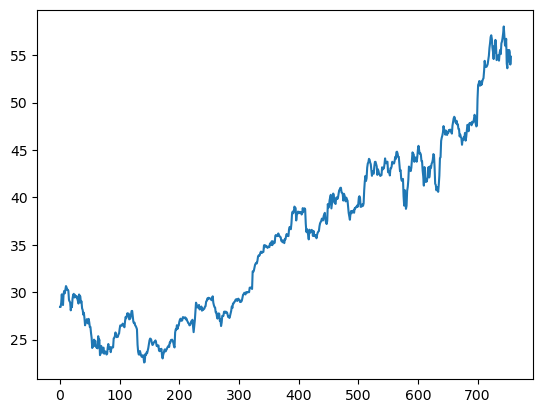

In [21]:
plt.plot(df.Close)

In [22]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
752    51.211900
753    51.296900
754    51.378425
755    51.448725
756    51.528250
Name: Close, Length: 757, dtype: float64

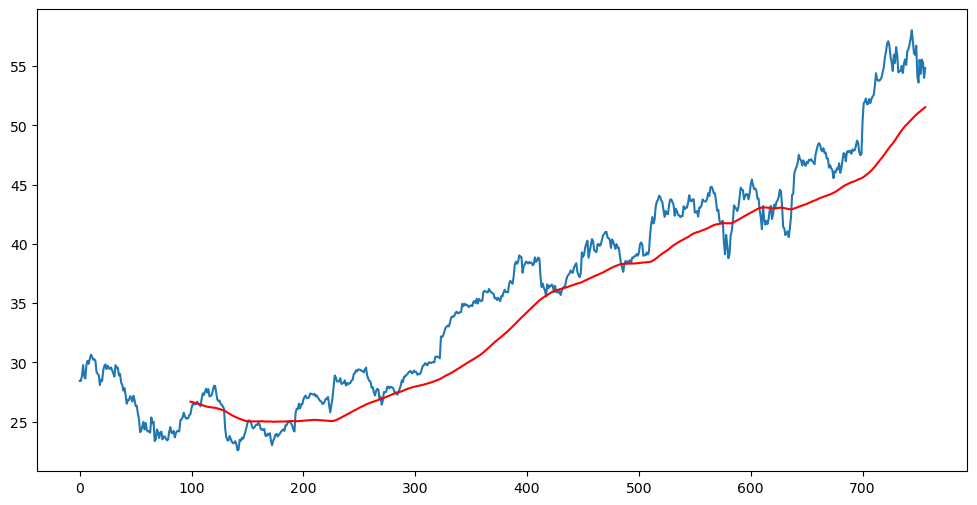

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [24]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
752    47.333738
753    47.399888
754    47.461050
755    47.515788
756    47.573638
Name: Close, Length: 757, dtype: float64

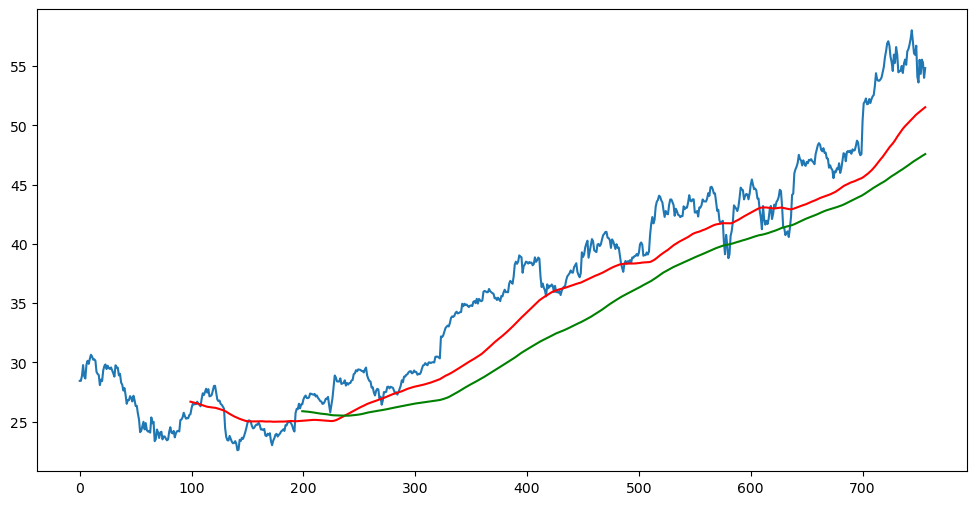

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [26]:
df.shape

(757, 6)

In [27]:
# Splittinf Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(529, 1)
(228, 1)


In [22]:
data_training.head()

,Close
0,28.442499
1,28.440001
2,28.875000
3,29.770000
4,28.820000


In [28]:
data_testing.head()


,Close
529,43.742500
530,43.522499
531,43.267502
532,42.369999
533,42.962502


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.272759  ],
       [0.27264265],
       [0.29289873],
       [0.33457512],
       [0.2903376 ],
       [0.2818394 ],
       [0.33678693],
       [0.35145517],
       [0.3394645 ],
       [0.35902213],
       [0.37520372],
       [0.36856811],
       [0.35599533],
       [0.35762512],
       [0.35192084],
       [0.30768332],
       [0.30000002],
       [0.29545986],
       [0.25611173],
       [0.27753203],
       [0.27182775],
       [0.31373692],
       [0.33108265],
       [0.33713625],
       [0.31909198],
       [0.33224677],
       [0.32235157],
       [0.31979043],
       [0.3254948 ],
       [0.31431894],
       [0.30197904],
       [0.28940626],
       [0.33399301],
       [0.32526193],
       [0.32467991],
       [0.29429574],
       [0.30069848],
       [0.26589059],
       [0.25774161],
       [0.23457508],
       [0.24447029],
       [0.21699657],
       [0.18265426],
       [0.19778817],
       [0.19662404],
       [0.2126892 ],
       [0.20593714],
       [0.191

In [30]:
x_train = []
y_train = []
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)


    

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [35]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
14/14 [==============================] - 3s 105ms/step - loss: 0.1349
Epoch 2/50
14/14 [==============================] - 1s 104ms/step - loss: 0.0417
Epoch 3/50
14/14 [==============================] - 1s 106ms/step - loss: 0.0295
Epoch 4/50
14/14 [==============================] - 1s 105ms/step - loss: 0.0159
Epoch 5/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0152
Epoch 6/50
14/14 [==============================] - 1s 105ms/step - loss: 0.0137
Epoch 7/50
14/14 [==============================] - 1s 106ms/step - loss: 0.0133
Epoch 8/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0131
Epoch 9/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0092
Epoch 10/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0117
Epoch 11/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0132
Epoch 12/50
14/14 [==============================] - 2s 108ms/step - loss: 0.0106
Epoch 13/50
14/14 [======

In [36]:
model.save('keras_model.h5')

/Users/coderlax/Anaconda/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
data_testing.head()

,Close
529,43.742500
530,43.522499
531,43.267502
532,42.369999
533,42.962502


In [38]:
data_training.tail()

,Close
524,42.775002
525,42.537498
526,42.494999
527,43.285000
528,43.740002


In [39]:
past_100_days= data_training.tail(100)

In [40]:
final_df = past_100_days.append(data_testing, ignore_index = True)

/var/folders/0m/c5s6vw751f3_jk7l34tjz4n40000gn/T/ipykernel_42801/3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [41]:
final_df.head()

,Close
0,36.022499
1,35.682499
2,36.044998
3,36.264999
4,36.382500


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01522275],
       [0.        ],
       [0.0162301 ],
       [0.02608016],
       [0.03134097],
       [0.03369162],
       [0.05641379],
       [0.07062902],
       [0.07644953],
       [0.08227004],
       [0.09279167],
       [0.08518021],
       [0.08439677],
       [0.10476829],
       [0.11204397],
       [0.12010308],
       [0.08764272],
       [0.07577797],
       [0.06715916],
       [0.08193426],
       [0.16129395],
       [0.14372073],
       [0.15289906],
       [0.17998657],
       [0.19420197],
       [0.20517125],
       [0.14092243],
       [0.1650996 ],
       [0.19162758],
       [0.21121567],
       [0.20393999],
       [0.16935307],
       [0.16532351],
       [0.16207756],
       [0.19084398],
       [0.19308258],
       [0.18513551],
       [0.19173945],
       [0.2097605 ],
       [0.22587873],
       [0.23080376],
       [0.23807926],
       [0.23863896],
       [0.21658835],
       [0.21468553],
       [0.20740985],
       [0.17797187],
       [0.210

In [54]:
input_data.shape

(328, 1)

In [55]:
x_test =[]
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(228, 100, 1)
(228,)


In [57]:
# Making Predicitions

y_predicted = model.predict(x_test)
y_predicted.shape

8/8 [==============================] - 0s 26ms/step


(228, 1)

In [58]:
y_test

array([0.36086861, 0.35101854, 0.33960161, 0.29941792, 0.3259459 ,
       0.31699131, 0.30299982, 0.30120887, 0.2941571 , 0.29762713,
       0.29818666, 0.33512423, 0.32426682, 0.33064702, 0.33008733,
       0.34967541, 0.3770987 , 0.35605544, 0.35392888, 0.36131626,
       0.36131626, 0.31161863, 0.31195441, 0.31732709, 0.29661962,
       0.33053498, 0.3301992 , 0.33915378, 0.36120439, 0.35392888,
       0.35370497, 0.35325715, 0.36433847, 0.38459812, 0.37452432,
       0.40709655, 0.40888733, 0.39993291, 0.38359077, 0.38403843,
       0.35247371, 0.31766287, 0.32214008, 0.28240438, 0.27132306,
       0.27647184, 0.28038952, 0.19890309, 0.15401845, 0.22722185,
       0.18815755, 0.13901944, 0.15312297, 0.22364012, 0.24188491,
       0.27580027, 0.33870613, 0.3324378 , 0.3259459 , 0.31721522,
       0.33322141, 0.36680099, 0.40564138, 0.39914931, 0.3961271 ,
       0.36120439, 0.37474823, 0.38157608, 0.379897  , 0.36154017,
       0.38291921, 0.41694644, 0.43642266, 0.41683457, 0.39970

In [59]:
scaler.scale_

array([0.04477277])

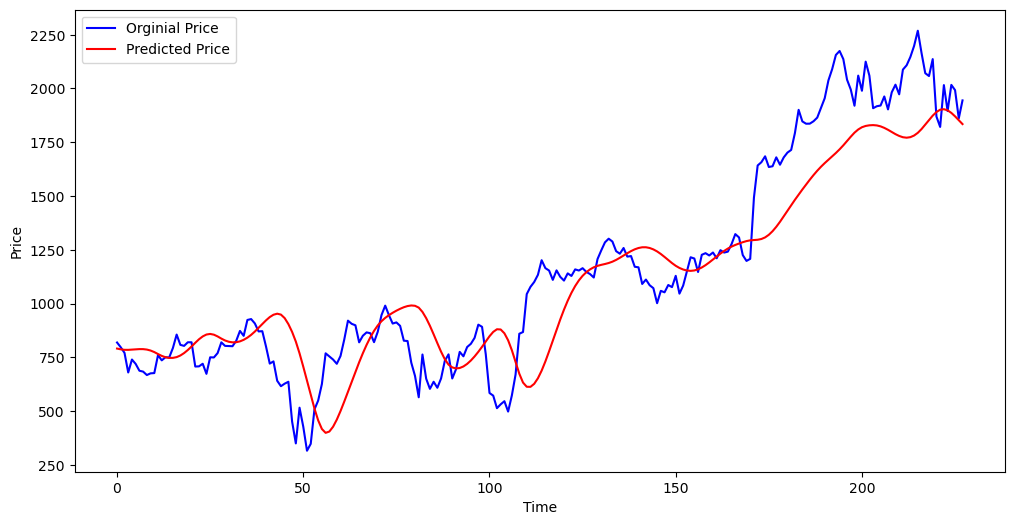

In [63]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor
plt.figure(figsize = (12,6))
plt.plot(y_test,'b', label = "Orginial Price")
plt.plot(y_predicted,'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()